# 15-Min City Exploration Notebook

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.options.display.max_rows = 999
pd.set_option("expand_frame_repr", True)

In [ ]:
# Getting data through walk score API
# https://medium.com/@cheng.cesar/15-min-city-8c00dbe279fc

In [29]:
#import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# graph networks
import networkx as nx 

# open street map data
# pip install osmnx
import osmnx as ox

from shapely.geometry import Point

In [20]:
# Define parameters here
place = 'Düsseldorf,Germany'
network_type = 'walk'
trip_times = [5,10,15,20] # in minutes
# travel_speed = 4.5 #walking speed in km/hour
Graph = ox.graph_from_address(place,network_type=network_type)

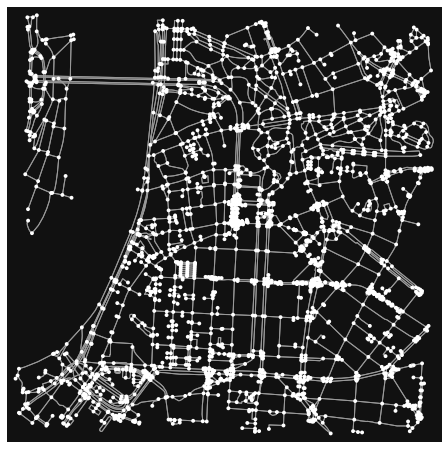

In [21]:
# Map of Düsseldorf
fig, ax = ox.plot_graph(ox.project_graph(Graph))

In [6]:
# choose DD point in Düsseldorf
# right click in google maps to find coordinate
center = (51.22032993226174, 6.794254347032914)
center_node = ox.get_nearest_node(Graph, center)

In [7]:
'''meters_per_minute = travel_speed * 1000 / 60 
for u, v, k, data in Graph.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute'''

"meters_per_minute = travel_speed * 1000 / 60 \nfor u, v, k, data in Graph.edges(data=True, keys=True):\n    data['time'] = data['length'] / meters_per_minute"

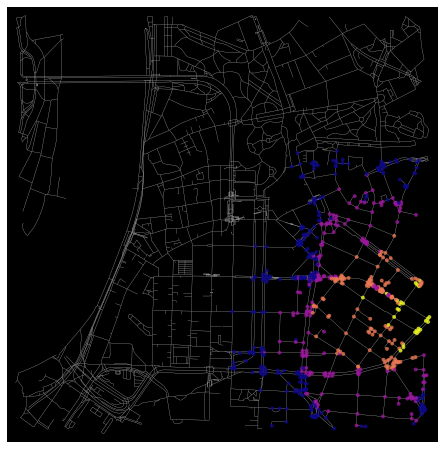

In [8]:
# color area that can be reached within specified time periods (5, 10, ...)

# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap='plasma', start=0, return_hex=True)
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(Graph, center_node, radius=trip_time,  distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else 'none' for node in Graph.nodes()]
ns = [15 if node in node_colors else 0 for node in Graph.nodes()]
# plot graph
fig, ax = ox.plot_graph(Graph, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2,
                        bgcolor='k', edge_linewidth=0.2, edge_color='#999999')

## Get WalkScore for the path between 'center' and 'address'

In [9]:
# Walk score from Düsseldorf HBf to Rewe
# pip install walkscore-api

from walkscore import WalkScoreAPI

api_key = "8f227f8bf72f5e084ebf2ce322118041"
walkscore_api = WalkScoreAPI(api_key = api_key)
address = 'Friedrichstraße 40a, 40217 Düsseldorf'
result = walkscore_api.get_score(latitude = center[0], longitude = center[1], address = address)

# the WalkScore for the location
print(f"Walk score for Düsseldorf HBf to Rewe: {result.walk_score}")

Walk score for Düsseldorf HBf to Rewe: 99


## Get distance between two points in Düsseldorf

In [11]:
# get graph for Düsseldorf
place = 'Düsseldorf, Germany'
network_type = 'walk'
#G = ox.graph_from_place(place, network_type=network_type)
G = ox.graph_from_address(place, network_type=network_type, dist=5000)

In [12]:
# get distance between two points
# not useful for our case

point_1 = (51.22032993226174, 6.794254347032914)
point_2 = (51.215050919169656, 6.777300331590118)

y1 = point_1[0]
x1 = point_1[1]
y2 = point_2[0]
x2 = point_2[1]

ox.distance.euclidean_dist_vec(y1, x1, y2, x2)

0.017756875256107477

In [13]:
# get distance between two points

point_1 = (51.22032993226174, 6.794254347032914)
point_2 = (51.215050919169656, 6.777300331590118)

orig_node = ox.get_nearest_node(G, point_1)
dest_node = ox.get_nearest_node(G, point_2)

dist_m = nx.shortest_path_length(G, orig_node, dest_node, weight='length')

print(f"The distance between the two points is {round(dist_m, 2)} meters.")

The distance between the two points is 1642.39 meters.


## Get Point of Interests around specified point

In [22]:
# get list of places in Düsseldorf
# https://wiki.openstreetmap.org/wiki/Map_features#Transportation

tags = {'amenity':True, 'landuse':['retail','commercial','transportation', 'education']} 
places_df = ox.geometries.geometries_from_address(place, tags=tags)
places_df = places_df.reset_index(level=[0,1])
places_df

,element_type,osmid,amenity,check_date,source,geometry,fee,name,parking,wheelchair,...,maxstay:conditional,construction:end_date,construction:start_date,quitting_hours,building:use:residential,building:part,room,parking:orientation,ways,building:roof:shape
0,node,240270700,telephone,2021-03-12,survey,POINT (6.78976 51.22756),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,240270717,parking_entrance,NaN,NaN,POINT (6.78733 51.22615),yes,Karstadt Parkhaus,multi-storey,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,240270723,cafe,NaN,survey,POINT (6.78746 51.22174),NaN,Zaxopondeiva Cafe,NaN,limited,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,240270745,pub,NaN,survey,POINT (6.78796 51.22126),NaN,Wilma Next Generation,NaN,limited,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,240270787,post_box,NaN,NaN,POINT (6.78729 51.21945),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,relation,8607,police,NaN,NaN,"POLYGON ((6.76765 51.21569, 6.76763 51.21567, ...",NaN,Polizeipräsidium,NaN,yes,...,NaN,1932,1929,NaN,NaN,NaN,NaN,NaN,"[23442872, 23442873, 23442874, 23442875]",flat
1523,relation,1965896,public_building,NaN,NaN,"POLYGON ((6.76966 51.22234, 6.76976 51.22248, ...",NaN,Palais Spee,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[145266539, 145266543]",NaN
1524,relation,4785870,school,NaN,NaN,"MULTIPOLYGON (((6.78731 51.23520, 6.78733 51.2...",NaN,Matthias-Claudius-Schule,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[334291400, 338471626]",NaN
1525,relation,6390053,NaN,NaN,NaN,"POLYGON ((6.77846 51.22558, 6.77726 51.22556, ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[142759466],NaN


In [23]:
# filter dataframe
places_filt_df = places_df[places_df["element_type"]=="node"]
places_filt_df

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,element_type,osmid,amenity,check_date,source,geometry,fee,name,parking,wheelchair,...,maxstay:conditional,construction:end_date,construction:start_date,quitting_hours,building:use:residential,building:part,room,parking:orientation,ways,building:roof:shape
0,node,240270700,telephone,2021-03-12,survey,POINT (6.78976 51.22756),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,240270717,parking_entrance,NaN,NaN,POINT (6.78733 51.22615),yes,Karstadt Parkhaus,multi-storey,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,240270723,cafe,NaN,survey,POINT (6.78746 51.22174),NaN,Zaxopondeiva Cafe,NaN,limited,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,240270745,pub,NaN,survey,POINT (6.78796 51.22126),NaN,Wilma Next Generation,NaN,limited,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,240270787,post_box,NaN,NaN,POINT (6.78729 51.21945),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,node,9026429141,bench,NaN,NaN,POINT (6.78221 51.22949),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1353,node,9026429142,bench,NaN,NaN,POINT (6.78225 51.22951),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1354,node,9026429143,waste_basket,NaN,NaN,POINT (6.78209 51.22946),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1355,node,9026429144,bench,NaN,NaN,POINT (6.78251 51.22927),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# list all types of amenities (top 25 by count)
places_filt_df[["amenity"]].value_counts()

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


amenity           
restaurant            197
bench                 190
waste_basket          114
bicycle_parking       101
vending_machine        91
cafe                   72
pub                    70
fast_food              46
recycling              38
post_box               36
telephone              33
parking_entrance       29
bar                    28
atm                    28
bank                   23
taxi                   22
doctors                21
nightclub              21
pharmacy               18
parking                17
toilets                17
fountain               12
theatre                12
clock                  10
kindergarten           10
shelter                 9
charging_station        8
library                 8
ice_cream               7
motorcycle_parking      7
dentist                 7
post_office             5
social_facility         4
arts_centre             4
cinema                  4
police                  3
ticket_validator        3
studio             

In [25]:
# define list of important places
important_places_list = [
    "biergarten", "college", "gambling"
]

In [26]:
# filter by important places
places_filt_df = places_filt_df[places_filt_df["amenity"].isin(important_places_list)]
places_filt_df.reset_index(drop=True, inplace=True)
places_filt_df

,element_type,osmid,amenity,check_date,source,geometry,fee,name,parking,wheelchair,...,maxstay:conditional,construction:end_date,construction:start_date,quitting_hours,building:use:residential,building:part,room,parking:orientation,ways,building:roof:shape
0,node,481083583,gambling,NaN,NaN,POINT (6.77236 51.22637),NaN,Merkur Spielothek,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,666210219,college,NaN,NaN,POINT (6.78605 51.21875),NaN,Düsseldorfer Akademie für Marketing-Kommunikation,NaN,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,2782005179,college,NaN,NaN,POINT (6.77593 51.22467),NaN,Internationales Bildungszentrum Die Brücke,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,4760469210,gambling,NaN,NaN,POINT (6.77672 51.21801),NaN,Magic 21 Spielhalle,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,7089723985,biergarten,NaN,NaN,POINT (6.77278 51.22600),NaN,da spiegel,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot map of Düsseldorf, two points, and the distance between these points as an example

In [27]:
# get graph for Düsseldorf
place = 'Düsseldorf, Germany'
network_type = 'walk'
G = ox.graph_from_address(place, network_type=network_type, dist=3000)

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# take random point from table
point = places_filt_df.at[0, "geometry"]
text = places_filt_df.at[0, "name"]

# define second point
center = (6.794692454576966, 51.22040873411635)
point_center = Point(center)

In [31]:
# find node on map based on coordinates
point_temp = (point.y, point.x)
orig_node = ox.get_nearest_node(G, point_temp)

center_temp = (point_center.y, point_center.x)
dest_node = ox.get_nearest_node(G, center_temp)

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


In [32]:
# calculate distance between two nodes
dist_m = nx.shortest_path_length(G, orig_node, dest_node, weight='length')

print(f"The distance between the two points is {round(dist_m)} meters.")

The distance between the two points is 1978 meters.


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# calculate travel time between two nodes
# 1 meter in 0.0133 minutes (4.5 km/h)

time = round(dist_m*0.0133)
print(f"Travel time: {time} minutes")

Travel time: 26 minutes


Text(0, 0, 'The distance between the two points is 1978 meters.\nTravel time: 26 minutes')

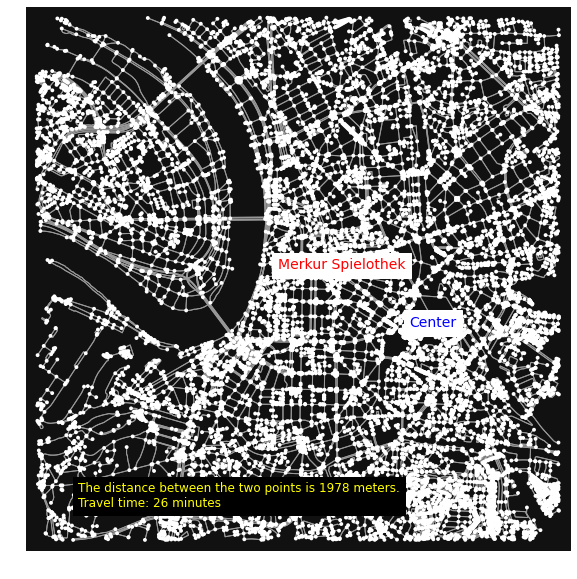

In [35]:
# plot whole map
ox.plot_graph(G, figsize=(10, 10), show=False, close=False)

# Point of Interest
plt.scatter(point.x, point.y, color="red") # plot point of POI
plt.text(1.0001*point.x, point.y, text, backgroundcolor="white",
         color="red", size=14) # plot name of POI

# Defined center
plt.scatter(point_center.x, point_center.y, color="blue") # plot point of center
plt.text(point_center.x, point_center.y, "Center", backgroundcolor="white",
         color="blue", size=14) # plot name of center

# plot information
plt.text(0, 0, f"The distance between the two points is {round(dist_m)} meters.\nTravel time: {time} minutes",
         transform=ax.transAxes, color="yellow", backgroundcolor="black", size=12)

## Loop through all selected places and create map + information

In [36]:
def calc_dist_and_time(point_1, point_2):
    
    # find node on map based on coordinates
    point_1_temp = (point_1.y, point_1.x)
    point_1_node = ox.get_nearest_node(G, point_1_temp)

    point_2_temp = (point_1.y, point_2.x)
    point_2_node = ox.get_nearest_node(G, point_2_temp)
    
    # calculate distance between two nodes
    dist_m = nx.shortest_path_length(G, point_1_node, point_2_node, weight='length')
    
    # calculate travel time based on 4.5km/h
    time = round(dist_m*0.0133)
    
    # return
    return dist_m, time

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
def plot_map(point_1, text_1, point_2, text_2):
    
    # plot whole map
    ox.plot_graph(G, figsize=(10, 10), show=False, close=False)

    # Point of Interest
    plt.scatter(point_1.x, point_1.y, color="red") # plot point of POI
    plt.text(1.0001*point_1.x, point_1.y, text_1, backgroundcolor="white",
             color="red", size=14) # plot name of POI

    # Defined center
    plt.scatter(point_2.x, point_2.y, color="blue") # plot point of center
    plt.text(point_2.x, point_2.y, text_2, backgroundcolor="white",
             color="blue", size=14) # plot name of center

    # plot information
    meta_data = calc_dist_and_time(point_1, point_2)
    dist_m = meta_data[0]
    time = meta_data[1]
    plt.text(0, 0, f"The distance between the two points is {round(dist_m)} meters.\nTravel time: {time} minutes",
             transform=ax.transAxes, color="yellow", backgroundcolor="black", size=12)
    
    plt.show()

In [40]:
# define main station as center / point 1
point_1 = Point(6.794692454576966, 51.22040873411635)
text_1 = "Düsseldorf main station"

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
places_filt_df

,element_type,osmid,amenity,check_date,source,geometry,fee,name,parking,wheelchair,...,maxstay:conditional,construction:end_date,construction:start_date,quitting_hours,building:use:residential,building:part,room,parking:orientation,ways,building:roof:shape
0,node,481083583,gambling,NaN,NaN,POINT (6.77236 51.22637),NaN,Merkur Spielothek,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,666210219,college,NaN,NaN,POINT (6.78605 51.21875),NaN,Düsseldorfer Akademie für Marketing-Kommunikation,NaN,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,2782005179,college,NaN,NaN,POINT (6.77593 51.22467),NaN,Internationales Bildungszentrum Die Brücke,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,4760469210,gambling,NaN,NaN,POINT (6.77672 51.21801),NaN,Magic 21 Spielhalle,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,7089723985,biergarten,NaN,NaN,POINT (6.77278 51.22600),NaN,da spiegel,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


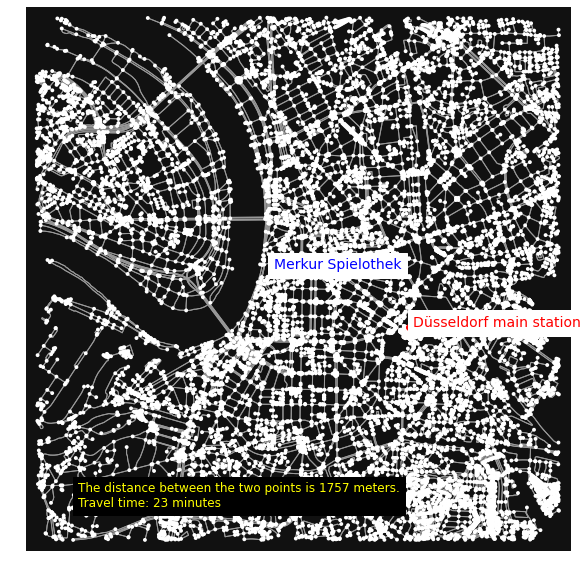

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


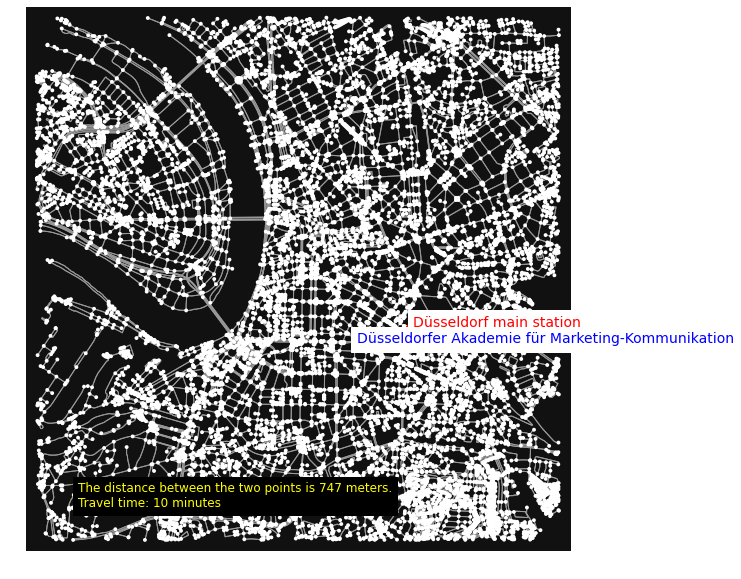

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


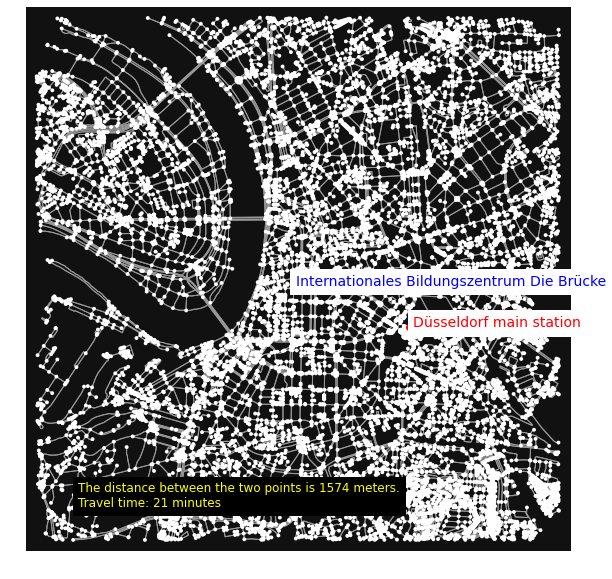

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


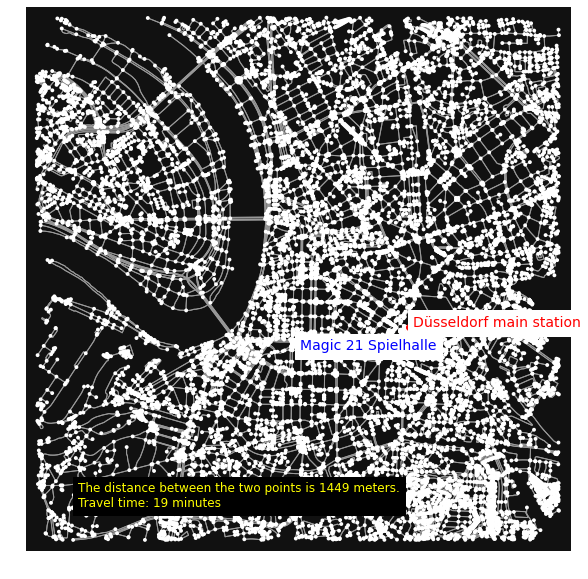

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


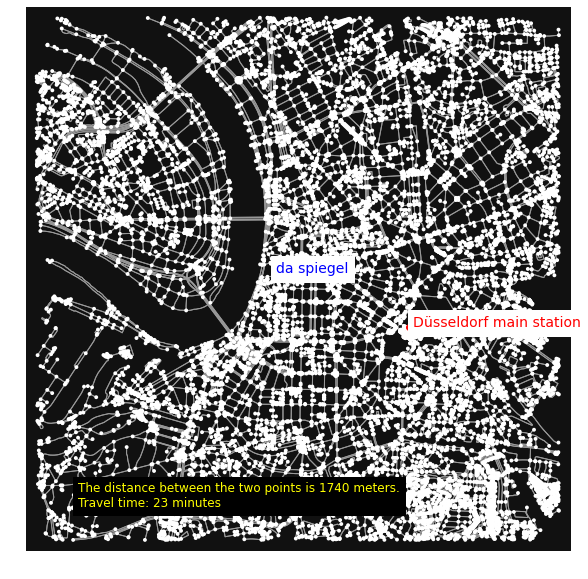

In [42]:
# loop through list of places, calculate distance and time, and plot map and information
for i in range(0,len(places_filt_df)):
    
    point_2 = places_filt_df.at[i, "geometry"]
    text_2 = places_filt_df.at[i, "name"]
    
    plot_map(point_1, text_1, point_2, text_2)

### Loop through all selected places and add information (distance, traveltime) to dataframe

In [43]:
# get list of places in Düsseldorf
# https://wiki.openstreetmap.org/wiki/Map_features#Transportation

tags = {'amenity':True, 'landuse':['retail','commercial','transportation', 'education']} 
places_df = ox.geometries.geometries_from_address(place, tags=tags)
places_df = places_df.reset_index(level=[0,1])
places_df

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,element_type,osmid,amenity,check_date,source,geometry,fee,name,parking,wheelchair,...,maxstay:conditional,construction:end_date,construction:start_date,quitting_hours,building:use:residential,building:part,room,parking:orientation,ways,building:roof:shape
0,node,240270700,telephone,2021-03-12,survey,POINT (6.78976 51.22756),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,240270717,parking_entrance,NaN,NaN,POINT (6.78733 51.22615),yes,Karstadt Parkhaus,multi-storey,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,240270723,cafe,NaN,survey,POINT (6.78746 51.22174),NaN,Zaxopondeiva Cafe,NaN,limited,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,240270745,pub,NaN,survey,POINT (6.78796 51.22126),NaN,Wilma Next Generation,NaN,limited,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,240270787,post_box,NaN,NaN,POINT (6.78729 51.21945),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,relation,8607,police,NaN,NaN,"POLYGON ((6.76765 51.21569, 6.76763 51.21567, ...",NaN,Polizeipräsidium,NaN,yes,...,NaN,1932,1929,NaN,NaN,NaN,NaN,NaN,"[23442872, 23442873, 23442874, 23442875]",flat
1523,relation,1965896,public_building,NaN,NaN,"POLYGON ((6.76966 51.22234, 6.76976 51.22248, ...",NaN,Palais Spee,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[145266539, 145266543]",NaN
1524,relation,4785870,school,NaN,NaN,"MULTIPOLYGON (((6.78731 51.23520, 6.78733 51.2...",NaN,Matthias-Claudius-Schule,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[334291400, 338471626]",NaN
1525,relation,6390053,NaN,NaN,NaN,"POLYGON ((6.77846 51.22558, 6.77726 51.22556, ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[142759466],NaN


In [44]:
# define main station as center / point 1
point_1 = Point(6.794692454576966, 51.22040873411635)
text_1 = "Düsseldorf main station"

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
# define list of important places
important_places_list = [
    "biergarten", "college", "gambling"
]

In [46]:
# filter by important places
places_filt_df = places_filt_df[places_filt_df["amenity"].isin(important_places_list)]
places_filt_df.reset_index(drop=True, inplace=True)
places_filt_df

,element_type,osmid,amenity,check_date,source,geometry,fee,name,parking,wheelchair,...,maxstay:conditional,construction:end_date,construction:start_date,quitting_hours,building:use:residential,building:part,room,parking:orientation,ways,building:roof:shape
0,node,481083583,gambling,NaN,NaN,POINT (6.77236 51.22637),NaN,Merkur Spielothek,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,666210219,college,NaN,NaN,POINT (6.78605 51.21875),NaN,Düsseldorfer Akademie für Marketing-Kommunikation,NaN,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,2782005179,college,NaN,NaN,POINT (6.77593 51.22467),NaN,Internationales Bildungszentrum Die Brücke,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,4760469210,gambling,NaN,NaN,POINT (6.77672 51.21801),NaN,Magic 21 Spielhalle,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,7089723985,biergarten,NaN,NaN,POINT (6.77278 51.22600),NaN,da spiegel,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# drop irrelevant columns
places_filt_df = places_filt_df[["osmid", "amenity", "geometry", "name"]]
places_filt_df

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,osmid,amenity,geometry,name
0,481083583,gambling,POINT (6.77236 51.22637),Merkur Spielothek
1,666210219,college,POINT (6.78605 51.21875),Düsseldorfer Akademie für Marketing-Kommunikation
2,2782005179,college,POINT (6.77593 51.22467),Internationales Bildungszentrum Die Brücke
3,4760469210,gambling,POINT (6.77672 51.21801),Magic 21 Spielhalle
4,7089723985,biergarten,POINT (6.77278 51.22600),da spiegel


In [48]:
# add center point
places_filt_df["center_point"] = point_1
places_filt_df

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,osmid,amenity,geometry,name,center_point
0,481083583,gambling,POINT (6.77236 51.22637),Merkur Spielothek,POINT (6.794692454576966 51.22040873411635)
1,666210219,college,POINT (6.78605 51.21875),Düsseldorfer Akademie für Marketing-Kommunikation,POINT (6.794692454576966 51.22040873411635)
2,2782005179,college,POINT (6.77593 51.22467),Internationales Bildungszentrum Die Brücke,POINT (6.794692454576966 51.22040873411635)
3,4760469210,gambling,POINT (6.77672 51.21801),Magic 21 Spielhalle,POINT (6.794692454576966 51.22040873411635)
4,7089723985,biergarten,POINT (6.77278 51.22600),da spiegel,POINT (6.794692454576966 51.22040873411635)


In [49]:
# function to calculate distance and travel time between two points
def calc_dist_and_time(point_1, point_2):
    
    # find node on map based on coordinates
    point_1_temp = (point_1.y, point_1.x)
    point_1_node = ox.get_nearest_node(G, point_1_temp)

    point_2_temp = (point_1.y, point_2.x)
    point_2_node = ox.get_nearest_node(G, point_2_temp)
    
    # calculate distance between two nodes
    dist_m = nx.shortest_path_length(G, point_1_node, point_2_node, weight='length')
    
    # calculate travel time based on 4.5km/h
    time = round(dist_m*0.0133)
    
    # return
    return dist_m, time

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
# calculate and add distance to defined center point (e.g., Düsseldorf Hbf)
places_filt_df["distance_in_m"] = places_filt_df.apply(
    lambda row: 
    calc_dist_and_time(point_1, row["geometry"])[0], 
    axis=1)

places_filt_df["travel_time"] = places_filt_df.apply(
    lambda row: 
    calc_dist_and_time(point_1, row["geometry"])[1], 
    axis=1)

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future rel

In [51]:
places_filt_df

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,osmid,amenity,geometry,name,center_point,distance_in_m,travel_time
0,481083583,gambling,POINT (6.77236 51.22637),Merkur Spielothek,POINT (6.794692454576966 51.22040873411635),1756.550,23
1,666210219,college,POINT (6.78605 51.21875),Düsseldorfer Akademie für Marketing-Kommunikation,POINT (6.794692454576966 51.22040873411635),747.110,10
2,2782005179,college,POINT (6.77593 51.22467),Internationales Bildungszentrum Die Brücke,POINT (6.794692454576966 51.22040873411635),1573.618,21
3,4760469210,gambling,POINT (6.77672 51.21801),Magic 21 Spielhalle,POINT (6.794692454576966 51.22040873411635),1449.026,19
4,7089723985,biergarten,POINT (6.77278 51.22600),da spiegel,POINT (6.794692454576966 51.22040873411635),1739.756,23


In [64]:
# example for scoring (color on map)
import numpy as np
mean = np.mean(places_filt_df["travel_time"])
mean

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


19.2

In [65]:
if mean<15:
    print("15 min point")
else:
    print("not 15 min point")

not 15 min point


In [63]:
# turn Graph G into nodes to check distance
nodes, edges = ox.graph_to_gdfs(G)
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
5269985,51.198483,6.736442,3,NaN,NaN,POINT (6.73644 51.19848)
5270135,51.206686,6.756832,3,NaN,NaN,POINT (6.75683 51.20669)
5278499,51.215004,6.761004,1,NaN,NaN,POINT (6.76100 51.21500)
21556382,51.221888,6.791452,4,NaN,NaN,POINT (6.79145 51.22189)
21556383,51.220719,6.789764,4,NaN,NaN,POINT (6.78976 51.22072)


In [62]:
# how many nodes in the Graph
len(nodes)

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16459